Credits for original titanic processing code to [Donne Martin](http://donnemartin.com) and Yeeun Kim. Source and license info is on [GitHub](https://github.com/donnemartin/data-science-ipython-notebooks). Main addition of decision trees

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

In [2]:
#Titanic dataset stored as train.csv
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


View the data types of each column:

In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Type 'object' is a string for pandas, which poses problems with machine learning algorithms.  If we want to use these as features, we'll need to convert these to number representations.

Get some basic information on the DataFrame:

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin, and Embarked are missing values.  Cabin has too many missing values, whereas we might be able to infer values for Age and Embarked.

Generate various descriptive statistics on the DataFrame:

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Age Histogram')

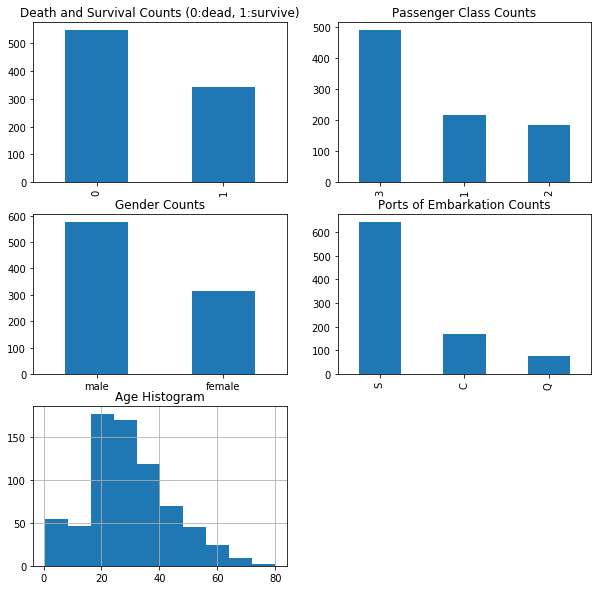

In [7]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts (0:dead, 1:survive)')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

Next we'll explore various features to view their impact on survival rates.

In [ ]:
#There are three passenger classes: First, Second, and Third class.  
#We'll determine which proportion of passengers survived based on their passenger class.
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Plot the cross tab:

In [ ]:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

We can see that passenger class seems to have a significant impact on whether a passenger survived.  Those in First Class the highest chance for survival.

Generate a mapping of Sex from a string to a number representation:

In [ ]:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

Transform Sex from a string to a number representation:

In [ ]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

Plot a normalized cross tab for Sex_Val and Survived:

In [ ]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0) #sex_val is calculated right from above
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender (0:female, 1:male)')

The majority of females survived, whereas the majority of males did not.

Next we'll determine whether we can gain any insights on survival rate by looking at **both Sex and Pclass.**

Count males and females in each Pclass:

In [ ]:
# Get the unique values of Pclass:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print('Male,   Pclass', p_class, ":",len(df_train[(df_train['Sex'] == 'male') & 
                             (df_train['Pclass'] == p_class)]))
    print('Female, Pclass', p_class, ":", len(df_train[(df_train['Sex'] == 'female') & 
                             (df_train['Pclass'] == p_class)]))

In [ ]:
# Plot survival rate by Sex
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Pclass
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

The vast majority of females in First and Second class survived.  Males in First class had the highest chance for survival.

## Feature: Embarked

The Embarked column might be an important feature but it is missing a couple data points which might pose a problem for machine learning algorithms:

In [ ]:
df_train[df_train['Embarked'].isnull()]

Prepare to map Embarked from a string to a number representation:

In [ ]:
# Get the unique values of Embarked

embarked_locs = (df_train['Embarked'].unique())
#embarked_locs = np.insert(embarked_locs, 0, np.nan)
embarked_locs_mapping = dict(zip(embarked_locs, 
                                 range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

Transform Embarked from a string to a number representation to prepare it for machine learning algorithms:

In [ ]:
df_train['Embarked_Val'] = df_train['Embarked'] \
                               .map(embarked_locs_mapping) \
                               .astype(int)
df_train.head()

Plot the histogram for Embarked_Val:

In [ ]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Since the vast majority of passengers embarked in 'S': 0, we assign the missing values in Embarked to 'S': 

In [ ]:
if len(df_train[df_train['Embarked'].isnull()]) > 0:
    df_train.replace({'Embarked_Val' : 
                   { embarked_locs_mapping[np.nan] : embarked_locs_mapping['S'] 
                   }
               }, 
               inplace=True)

Verify we do not have any more NaNs for Embarked_Val:

In [ ]:
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

Plot a normalized cross tab for Embarked_Val and Survived:

In [ ]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation (0:S, 1:C, 2:Q)')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

It appears those that embarked in location 'C': 1 had the highest rate of survival. 

Leaving Embarked as integers implies ordering in the values, which does not exist.  Another way to represent Embarked without ordering is to create dummy variables (Embarked_Val_0, Embarked_Val_1, Embarked_Val_2):

In [ ]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked_Val'], prefix='Embarked_Val')], axis=1)

In [ ]:
df_train.head()

## Feature: Age

The Age column seems like an important feature--unfortunately it is missing many values.  We'll need to fill in the missing values like we did with Embarked.

Filter to view missing Age values:

In [ ]:
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

Determine the Age typical for each passenger class by Sex_Val.  We'll use the median instead of the mean because the Age histogram seems to be right skewed.

In [ ]:
# To keep Age in tact, make a copy of it called AgeFill 
# that we will use to fill in the missing ages:
df_train['AgeFill'] = df_train['Age']

# Populate AgeFill
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

Ensure AgeFill does not contain any missing values:

In [ ]:
print(len(df_train[df_train['AgeFill'].isnull()]))
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age','AgeFill']].head()

Plot a normalized cross tab for AgeFill and Survived:

In [ ]:
# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['AgeFill']
df2 = df_train[df_train['Survived'] == 1]['AgeFill']

max_age = max(df_train['AgeFill'])
plt.hist([df1, df2], 
             bins=int(max_age / bin_size), 
             range=(1, max_age),
             stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')



Unfortunately, the graphs above do not seem to clearly show any insights.  We'll keep digging further.

Plot AgeFill density by Pclass:

In [ ]:
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

When looking at AgeFill density by Pclass, we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers.  We've determined that first class passengers had a higher survival rate than second class passengers, which in turn had a higher survival rate than third class passengers.

In [ ]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# Plot the AgeFill histogram for Survivors
plt.subplot2grid(fig_dims, (0, 0))
survived_df = df_train[df_train['Survived'] == 1]
survived_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.title("Age histogram for survivors")
plt.axis([0,max_age,0,130])

# Plot the AgeFill histogram for Females
plt.subplot2grid(fig_dims, (1, 0))
females_df = df_train[(df_train['Sex_Val'] == 0) & (df_train['Survived'] == 1)]
females_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.title("Age histogram for female survivors")
plt.axis([0,max_age,0,130])

# Plot the AgeFill histogram for first class passengers
plt.subplot2grid(fig_dims, (2, 0))
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]
class1_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.title("Age histogram for survivors with pcl")
plt.axis([0,max_age,0,130])

In the first graph, we see that most survivors come from the 20's to 30's age ranges and might be explained by the following two graphs.  The second graph shows most females are within their 20's.  The third graph shows most first class passengers are within their 30's.

## Feature: Family Size

Feature enginering involves creating new features or modifying existing features which might be advantageous to a machine learning algorithm.

Define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

Plot a histogram of FamilySize:

In [ ]:
df_train['FamilySize'].hist()
plt.title('Family Size Histogram')

Plot a histogram of AgeFill segmented by Survived:

In [ ]:
# Get the unique values of Embarked and its maximum
family_sizes = sorted(df_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 0]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

Based on the histograms, it is not immediately obvious what impact FamilySize has on survival.  The machine learning algorithms might benefit from this feature.

Additional features we might want to engineer might be related to the Name column, for example honorrary or pedestrian titles might give clues and better predictive power for a male's survival.

## Final Data Preparation for Machine Learning

Many machine learning algorithms do not work on strings and they usually require the data to be in an array, not a DataFrame.

Show only the columns of type 'object' (strings):

In [ ]:
df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

Drop the columns we won't use:

In [ ]:
df_train = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], 
                         axis=1)

Drop the following columns:
* The Age column since we will be using the AgeFill column instead.
* The SibSp and Parch columns since we will be using FamilySize instead.
* The PassengerId column since it won't be used as a feature.
* The Embarked_Val as we decided to use dummy variables instead.

In [ ]:
df_train = df_train.drop(['Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val'], axis=1)
df_train.dtypes

Convert the DataFrame to a numpy array:

In [ ]:
train_data = df_train.values
train_data

## Split train and test data

We'll split our training data, 80% will go to "train" and 20% will go to "test":

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

# 'Survived' column values
train_target = train_data[:, 0]

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)

print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

# print (train_x)
# print (train_y)


## Logistic Regression Model

Create the logistic regression model:

In [ ]:
from sklearn.linear_model import LogisticRegression

## Type your own code
# instantiate our model and fit the model with the training data
# LogisticRegression(solver = 'liblinear')

clf_lr = LogisticRegression(solver='liblinear')
clf_lr = clf_lr.fit(train_x, train_y)



Logistic regression model gives predicted probability and according to the probability, it decides the result in binary. Now, let's predict the result using train data.

In [ ]:
## Type your own code
# generate predictions from our fitted logistic regression model with train data
# '.predict_proba' shows the predicted probability
# in this case, first column is probability to survive and second col is probability to dead
# '.predict' provides classification result

ypred_prob = clf_lr.predict_proba(train_x)
ypred = clf_lr.predict(train_x)

print(ypred_prob)

In [ ]:
# plot the predicted value
x_idx = np.arange(train_x.shape[0])

plt.plot(x_idx, ypred_prob[:,0], 'bo', x_idx, ypred_prob[:,1], 'go',x_idx, ypred, 'mo', alpha=.2);
plt.title('Logit predictions, (0:dead, 1:survive) \
          \n Blue and green: predicted probability(survival and dead), Red: predicted values');

In [ ]:
# plot the predicted value
x_idx = np.arange(train_x.shape[0])

plt.plot(x_idx, ypred, 'mo', x_idx, train_y, 'b.',alpha=.3);
plt.title('Logit predictions, (0:dead, 1:survive) \
          \n Blue: actual data (ground truth), Red: predicted values');

## Logistic Regression Model: Evaluate Model 

Use the **test data** to predict, and evaluate the model with 

1) Accuracy, 2) Precision, 3) Recall, 4) F1 score

### Confusion Matrix

    |                | condition True | condition false |
    |----------------|----------------|-----------------|
    |prediction true | True Positive  | False positive  |
    |Prediction False| False Negative | True Negative   |

In [ ]:
from sklearn.metrics import confusion_matrix 

## type your own code
# generate prediction from fitted logistic regression model with test data
# then makes the confusion matrix using 'metrics.confusion_matrix(true, predicted)' function
# provides confusion matrix with actual data and predicted data.
predicted_y = clf_lr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, predicted_y) 


In [ ]:
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

### 1) Accuracy

$$Accuracy=\frac{TP+TN}{All}$$

In [ ]:
# Mean accuracy on the given data and labels
## Type your own code ##
# scoring the logistic regression model with test data
# '.score' gives the mean accuracy with given data set
# Or you can calculate accuracy with confusion matrix obtained above

accuracy = (confusion_matrix[1,1] + confusion_matrix[0,0]) / confusion_matrix.sum()

accuracy2 =  clf_lr.score(test_x, test_y)

print(accuracy == accuracy2)


In [ ]:
print("Logistic Regression Model")
print("-------------------------")
print("Mean accuracy with test data:", accuracy)


### 2) Precision, 3) Recall, 4) F1 score

$$Precision = \frac{TP}{TP + FP}$$ 

$$Recall = \frac{TP}{TP + FN}$$ 

$$F1 = \frac{2TP}{2TP + FP + FN}$$ 

In [ ]:
from sklearn.metrics import classification_report

##Type your own code
# 'classification_report(true, predicted, target_names)' gives you classification summary
# including precision, recall, and f1-score
# use 'target_names=['Not Survived', 'Survived']'

summary = classification_report(test_y, predicted_y, target_names=['Not Survived', 'Survived'])

In [ ]:
print(summary)

## Support Vector Machine

Create the logistic regression model:

Create the logistic regression model:

In [ ]:
from sklearn import svm

## Type your own code
# instantiate our model and fit the model with the training data
# svm.SVC(gamma = 'scale', kernel = 'rbf')

clf_svm = svm.SVC(gamma='scale', kernel='rbf')
clf_svm.fit(train_x, train_y)


Logistic regression model gives predicted probability and according to the probability, it decides the result in binary. Now, let's predict the result using train data.

In [ ]:
## Type your own code
# generate predictions from our fitted svm model with train data
# '.predict' provides classification result

ypred = clf_svm.predict(train_x)


In [ ]:
# plot the predicted value
x_idx = np.arange(train_x.shape[0])

plt.plot(x_idx, ypred, 'mo', x_idx, train_y, 'b.',alpha=.3);
plt.title('Support Vector Machine, (0:dead, 1:survive) \
          \n Blue: actual data (ground truth), Red: predicted values');

## Support Vector Machine: Evaluate Model 

Use the **test data** to predict, and evaluate the model with 

1) Accuracy, 2) Precision, 3) Recall, 4) F1 score

### Confusion Matrix

    |                | condition True | condition false |
    |----------------|----------------|-----------------|
    |prediction true | True Positive  | False positive  |
    |Prediction False| False Negative | True Negative   |

In [ ]:
## type your own code
# 'metrics.confusion_matrix(true, predicted)' 
# provides confusion matrix with actual data and predicted data.
predict_y = clf_svm.predict(test_x)
confusion_matrix = metrics.confusion_matrix(test_y, predict_y)


In [ ]:
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

### 1) Accuracy

$$Accuracy=\frac{TP+TN}{All}$$

In [ ]:
# Mean accuracy on the given data and labels
## Type your own code ##
# scoring the support vector machine model with test data
# '.score' gives the mean accuracy with given data set
# Or you can calculate accuracy with confusion matrix obtained above

accuracy = (confusion_matrix[1,1] + confusion_matrix[0,0]) / confusion_matrix.sum()

accuracy2 =  clf_lr.score(test_x, test_y)

print(accuracy == accuracy2)


In [ ]:
print("Support Vector Machine")
print("-------------------------")
print("Mean accuracy with test data:", accuracy)

### 2) Precision, 3) Recall, 4) F1 score

$$Precision = \frac{TP}{TP + FP}$$ 

$$Recall = \frac{TP}{TP + FN}$$ 

$$F1 = \frac{2TP}{2TP + FP + FN}$$ 

In [ ]:
from sklearn.metrics import classification_report

##Type your own code
# 'classification_report(true, predicted, target_names)' gives you classification summary
# including precision, recall, and f1-score
# use 'traget_names=['Not Survived', 'Survived']'
summary = classification_report(test_y, predict_y, target_names=['Not Survived', 'Survived'])


In [ ]:
print(summary)